In [88]:
#https://matplotlib.org/gallery/color/named_colors.html
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import math 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import f1_score
from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [25]:
df = pd.read_csv('data(1).csv')
df['DateTime'] = pd.to_datetime(df['date'])
df

,Unnamed: 0,Unnamed: 0.1,unique_key,case_number,date,block,iucr,primary_type,description,location_description,...,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,DateTime
0,4001774,4001774,4324667,HL629300,2005-09-22 19:55:41+00:00,026XX N HOYNE AVE,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,CHA PARKING LOT/GROUNDS,...,7.0,26,1162364.0,1917615.0,2005,2018-02-10 15:50:01+00:00,41.929597,-87.678774,"(41.929597339, -87.678773892)",2005-09-22 19:55:41+00:00
1,6518132,6518132,10349385,HY540220,2015-12-17 00:01:00+00:00,077XX S AVALON AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,...,45.0,07,1185889.0,1853900.0,2015,2018-02-10 15:50:01+00:00,41.754235,-87.594342,"(41.754234523, -87.594341856)",2015-12-17 00:01:00+00:00
2,2537554,2537554,6225576,HP312801,2008-03-18 17:00:00+00:00,058XX W BELMONT AVE,1110,DECEPTIVE PRACTICE,BOGUS CHECK,ATM (AUTOMATIC TELLER MACHINE),...,15.0,11,1136688.0,1920673.0,2008,2018-02-28 15:56:25+00:00,41.938488,-87.773054,"(41.938487938, -87.77305366)",2008-03-18 17:00:00+00:00
3,4089395,4089395,7217499,HR633143,2009-11-08 18:00:00+00:00,013XX N ROCKWELL ST,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,...,24.0,03,1158831.0,1908634.0,2009,2018-02-28 15:56:25+00:00,41.905026,-87.692003,"(41.905026073, -87.692003482)",2009-11-08 18:00:00+00:00
4,5677118,5677118,3313381,HK350115,2004-05-08 03:30:00+00:00,029XX S DEARBORN ST,1365,CRIMINAL TRESPASS,TO RESIDENCE,CHA APARTMENT,...,35.0,26,1176241.0,1885750.0,2004,2018-02-28 15:56:25+00:00,41.841856,-87.628742,"(41.841855999, -87.628741678)",2004-05-08 03:30:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,3977215,3977215,2832042,HJ494685,2002-12-27 13:00:00+00:00,002XX E OHIO ST,0890,THEFT,FROM BUILDING,OTHER,...,8.0,06,1177936.0,1904246.0,2002,2018-02-28 15:56:25+00:00,41.892572,-87.621959,"(41.892571811, -87.621959165)",2002-12-27 13:00:00+00:00
499996,17782,17782,1837035,G667498,2001-11-05 20:40:00+00:00,024XX N KILDARE AV,2022,NARCOTICS,POSS: COCAINE,SIDEWALK,...,25.0,18,1147270.0,1915848.0,2001,2015-08-17 15:03:40+00:00,41.925051,-87.734286,"(41.92505133, -87.734285837)",2001-11-05 20:40:00+00:00
499997,3446950,3446950,6309414,HP397430,2008-06-15 21:45:00+00:00,002XX S OAKLEY BLVD,2220,LIQUOR LAW VIOLATION,ILLEGAL POSSESSION BY MINOR,VEHICLE NON-COMMERCIAL,...,28.0,22,1161112.0,1898934.0,2008,2018-02-10 15:50:01+00:00,41.878361,-87.683894,"(41.878361361, -87.683894347)",2008-06-15 21:45:00+00:00
499998,6193966,6193966,11599307,JC156816,2019-02-17 08:00:00+00:00,029XX N LINCOLN AVE,0890,THEFT,FROM BUILDING,RESIDENCE PORCH/HALLWAY,...,6.0,06,1166816.0,1919677.0,2019,2019-02-24 16:09:21+00:00,41.935161,-87.662355,"(41.935161145, -87.6623548)",2019-02-17 08:00:00+00:00


In [21]:
df.dtypes

Unnamed: 0                            int64
Unnamed: 0.1                          int64
unique_key                            int64
case_number                          object
date                                 object
block                                object
iucr                                 object
primary_type                         object
description                          object
location_description                 object
arrest                                 bool
domestic                               bool
beat                                  int64
district                            float64
ward                                float64
community_area                      float64
fbi_code                             object
x_coordinate                        float64
y_coordinate                        float64
year                                  int64
updated_on                           object
latitude                            float64
longitude                       

In [24]:
df['date'] = df['DateTime'].dt.date
df['time'] = df['DateTime'].dt.time

df['day'] = df['DateTime'].dt.day
df['month'] = df['DateTime'].dt.month
df['year'] = df['DateTime'].dt.year

df1 = df[["date", 'month', 'day', 'year', "time","case_number","DateTime","primary_type", "domestic"]]

df1.loc[df1['month'] == 1, 'season'] = 'winter'  
df1.loc[df1['month'] == 2, 'season'] = 'winter'  
df1.loc[df1['month'] == 3, 'season'] = 'spring'  
df1.loc[df1['month'] == 4, 'season'] = 'spring'  
df1.loc[df1['month'] == 5, 'season'] = 'spring'  
df1.loc[df1['month'] == 6, 'season'] = 'summer'  
df1.loc[df1['month'] == 7, 'season'] = 'summer'  
df1.loc[df1['month'] == 8, 'season'] = 'summer'  
df1.loc[df1['month'] == 9, 'season'] = 'fall'  
df1.loc[df1['month'] == 10, 'season'] = 'fall'  
df1.loc[df1['month'] == 11, 'season'] = 'fall'  
df1.loc[df1['month'] == 12, 'season'] = 'winter'

df1

,date,month,day,year,time,case_number,DateTime,primary_type,domestic,season
0,2005-09-22,9,22,2005,19:55:41,HL629300,2005-09-22 19:55:41+00:00,CRIMINAL TRESPASS,False,fall
1,2015-12-17,12,17,2015,00:01:00,HY540220,2015-12-17 00:01:00+00:00,MOTOR VEHICLE THEFT,False,winter
2,2008-03-18,3,18,2008,17:00:00,HP312801,2008-03-18 17:00:00+00:00,DECEPTIVE PRACTICE,False,spring
3,2009-11-08,11,8,2009,18:00:00,HR633143,2009-11-08 18:00:00+00:00,ROBBERY,False,fall
4,2004-05-08,5,8,2004,03:30:00,HK350115,2004-05-08 03:30:00+00:00,CRIMINAL TRESPASS,False,spring
...,...,...,...,...,...,...,...,...,...,...
499995,2002-12-27,12,27,2002,13:00:00,HJ494685,2002-12-27 13:00:00+00:00,THEFT,False,winter
499996,2001-11-05,11,5,2001,20:40:00,G667498,2001-11-05 20:40:00+00:00,NARCOTICS,False,fall
499997,2008-06-15,6,15,2008,21:45:00,HP397430,2008-06-15 21:45:00+00:00,LIQUOR LAW VIOLATION,False,summer
499998,2019-02-17,2,17,2019,08:00:00,JC156816,2019-02-17 08:00:00+00:00,THEFT,False,winter


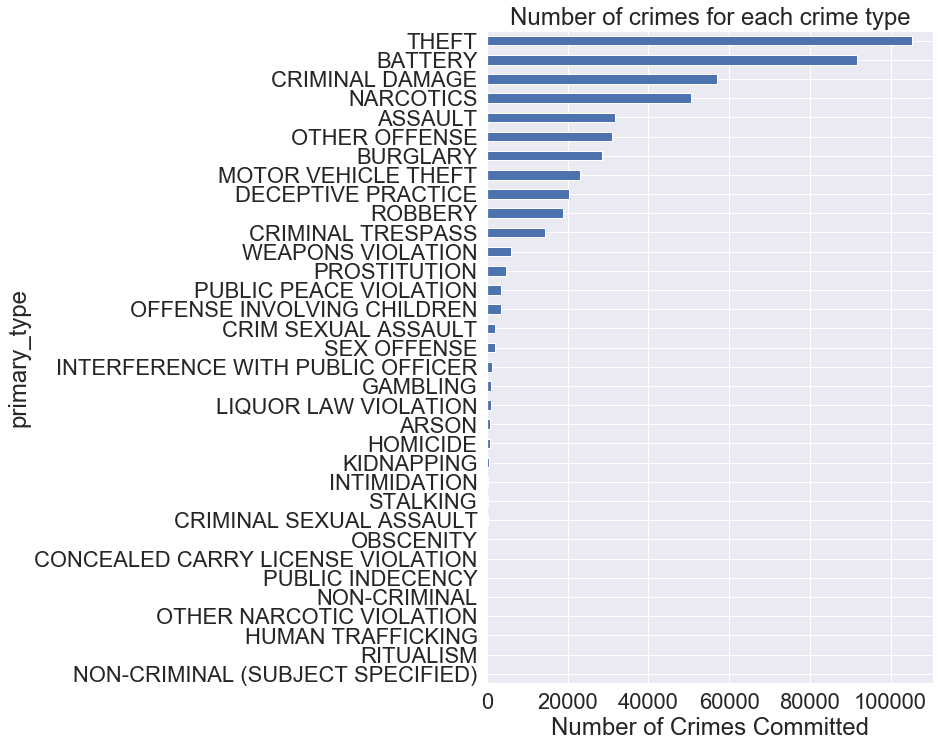

In [36]:
#plot of the relatives amounts of each type of crime
plt.figure(figsize = (8,12))
df1.groupby(df1['primary_type']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Number of crimes for each crime type')
plt.xlabel('Number of Crimes Committed')
plt.show()

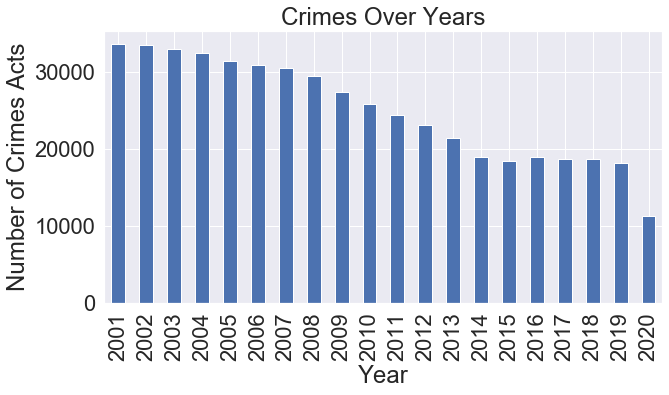

In [35]:
plt.figure(figsize = (10,5))
x=df1.groupby([df1.year]).size().plot.bar()
plt.title('Crimes Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()

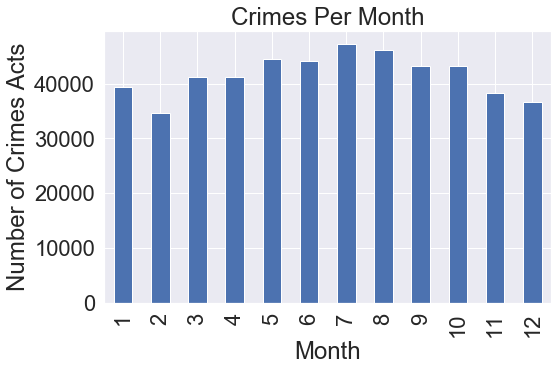

In [33]:
plt.figure(figsize = (8,5))
#make graph of crimes per month
df1.groupby([df1.month]).size().plot.bar()
plt.title('Crimes Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()


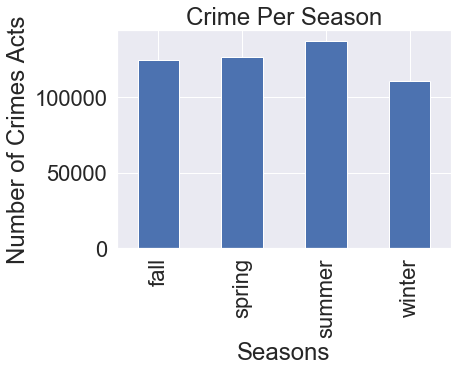

In [37]:
df1.groupby([df1.season]).size().plot.bar()
plt.title('Crime Per Season')
plt.xlabel('Seasons')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [48]:
Crime_Data_district = df.pivot_table('arrest', aggfunc = np.sum, columns = ['district'], 
                                         index = df1.date, fill_value = 0)
Crime_Data_ward = df.pivot_table('arrest', aggfunc = np.sum, columns = ['ward'], 
                                         index = df1.date, fill_value = 0)
Crime_Data_ca = df.pivot_table('arrest', aggfunc = np.sum, columns = ['community_area'], 
                                         index = df1.date, fill_value = 0)

arrest_per_year = df.groupby('year')['arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,arrest,Counts,Percentage
year,,,
2001,False,23800,70.683971
2001,True,9871,29.316029
2002,False,23895,71.358180
2002,True,9591,28.641820
2003,False,23179,70.267075
2003,True,9808,29.732925
2004,False,22423,69.038456
2004,True,10056,30.961544
2005,False,21486,68.363613


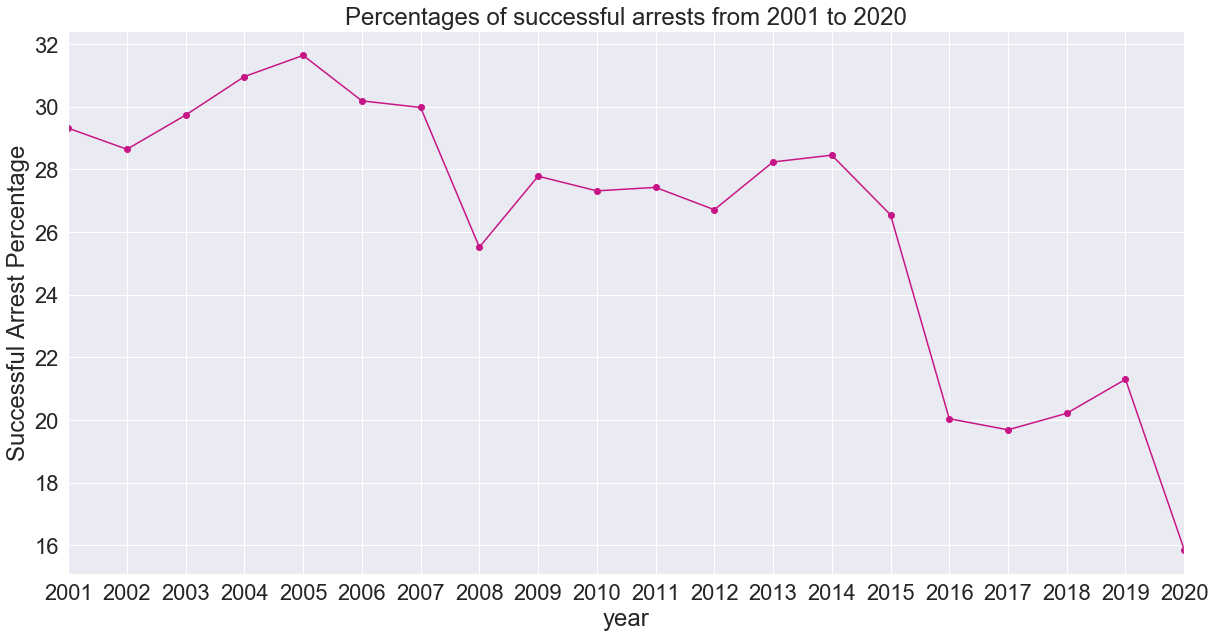

In [49]:
## Create a line plot for percentages of successful arrests over time (2001 to present)
line_plot = arrest_per_year[arrest_per_year['arrest'] == True]['Percentage']

## Configure line plot to make visualizing data cleaner
labels = line_plot.index.values
fig=plt.figure(figsize=(20, 10))
plt.title('Percentages of successful arrests from 2001 to 2020')
plt.xlabel("Year")
plt.ylabel("Successful Arrest Percentage")
plt.xticks(line_plot.index, line_plot.index.values)

line_plot.plot(grid=True, marker='o', color='mediumvioletred')

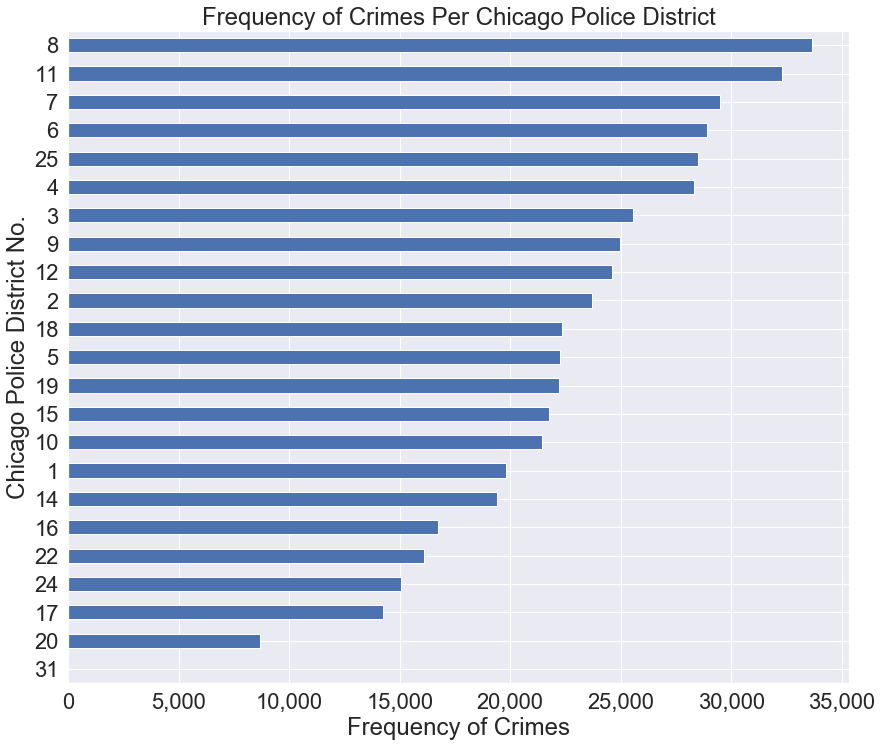

In [50]:
# calculating total number of incidents per district
district_crime = df['district'].value_counts(ascending=True)

## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

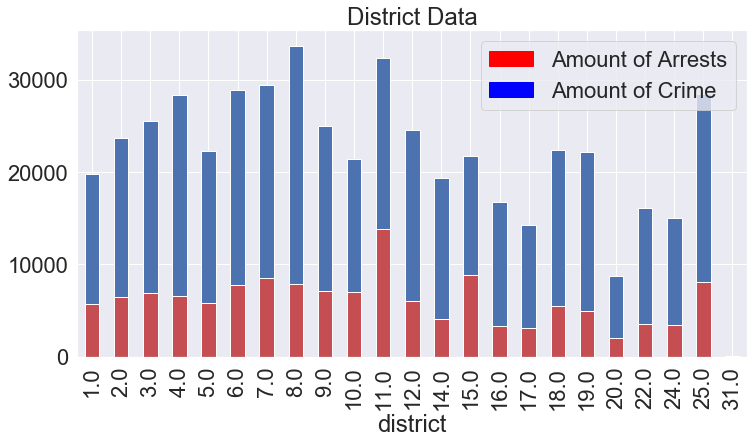

In [55]:
import matplotlib.patches as mpatches
red = mpatches.Patch(color='red', label='Amount of Arrests')
blue = mpatches.Patch(color='blue', label='Amount of Crime')


#crime per district
plt.figure(figsize = (12,6))
#plt.hold(True)
df.groupby(df['district']).size().plot(kind = 'bar')
Crime_Data_district.sum().plot(kind = 'bar', color = 'r')
plt.title('District Data')
plt.legend(handles=[red, blue])
#plt.hold(False)

In [ ]:
#Model Building

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [59]:
train.arrest.value_counts()

False    250616
True     101965
Name: arrest, dtype: int64

In [60]:
test.arrest.value_counts()

False    71495
True     23695
Name: arrest, dtype: int64

In [61]:
train.columns

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'DateTime', 'time', 'day', 'month', 'season',
       'crimes_per_year', 'prev_crimes_per_year', 'primary_type_grouped'],
      dtype='object')

In [62]:
train_labels = train['arrest']
train = train[['year', 'domestic','district','season','month','location_description','description','primary_type_grouped','crimes_per_year']]

test_labels = test['arrest']
test = test[['year', 'domestic','district','season','month','location_description','description','primary_type_grouped','crimes_per_year']]

#data_model = pd.get_dummies(data_model)
#data_model = pd.get_dummies(data_model)

In [63]:
#train.ward = pd.factorize(train.ward)[0]
train.district = pd.factorize(train.district)[0]
#train.beat = pd.factorize(train.beat)[0]
#train.community_area = pd.factorize(train.community_area)[0]
train.location_description = pd.factorize(train.location_description)[0]
train.description = pd.factorize(train.description)[0]

#test.ward = pd.factorize(test.ward)[0]
test.district = pd.factorize(test.district)[0]
#test.beat = pd.factorize(test.beat)[0]
#test.community_area = pd.factorize(test.community_area)[0]
test.location_description = pd.factorize(test.location_description)[0]
test.description = pd.factorize(test.description)[0]

In [64]:
train.primary_type_grouped = pd.factorize(train.primary_type_grouped)[0]
test.primary_type_grouped = pd.factorize(test.primary_type_grouped)[0]

train.season = pd.factorize(train.season)[0]
test.season = pd.factorize(test.season)[0]

In [65]:
train_labels.value_counts()

False    250616
True     101965
Name: arrest, dtype: int64

In [67]:
test_labels.value_counts()

False    71495
True     23695
Name: arrest, dtype: int64

In [70]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [71]:
train.shape

(352581, 9)

In [72]:
test.shape

(95190, 9)

In [73]:
x = [i/10 for i in list(range(1,31))]
x

[0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0]

In [79]:
model = LogisticRegression(class_weight='balanced').fit(train, train_labels)
y_pred = model.predict(test)
best_score = f1_score(test_labels, y_pred)

In [81]:
feature = ''
for column in train.columns:
    x = train.drop(column, axis=1)
    x_test = test.drop(column, axis=1)
    model = LogisticRegression(class_weight='balanced').fit(x, train_labels)
    y_pred = model.predict(x_test)
    score = f1_score(test_labels, y_pred)
    if score > best_score:
        remove_feature = feature
        best_score = score

In [82]:
feature

''

In [89]:
model = LogisticRegression(C=2.0,class_weight='balanced').fit(train, train_labels)
y_pred = model.predict(test)
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.40      0.53     71495
        True       0.28      0.69      0.39     23695

    accuracy                           0.47     95190
   macro avg       0.54      0.54      0.46     95190
weighted avg       0.67      0.47      0.50     95190

